# Исследование рынка игр

Для исследования взяты исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы. 

Цель исследования - анализ рынка игр и выявление закономерностей, которые позволят определить успешность игры. Данные будут использованы для рекламной кампании на следующий год.

Исследование будет состоять из нескольких этапов:
- предобработка данных (заполнение пропусков и выявление аномалий)
- проведение исследовательского анализа данных
- составление портрета пользователя каждого региона 
- проверка гипотез 
- вывод

Описание данных
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

### Откроем файл с данными и изучим общую информацию. 

In [1]:
# импортируем библиотеки, которые могут нам понадобится
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as st

In [2]:
# прочитаем csv-файл
data = pd.read_csv('/datasets/games.csv')

# выведем первые строки для изучения данных
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
#изучим информацию о датафрейме
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
# проверим есть ли явные дубликаты объявлений
data.duplicated().sum()

0

**Вывод**

Теперь у нас есть первоначальное представление о датафрейме и вся информация о типе данных:

- Year_of_Release необходимо сделать числовым типом
- User_Score - необходимо привести к числовому
- название столбцов необходимо привести к нижнему регистру для удобства
- необходимо избавиться от пропусков или заменить их на другие значения


### Предобработка данных

#### Изменение регистра


In [5]:
#преобразуем названия стобцов в нижний регистр
data.columns = data.columns.str.lower()
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


#### Заполнение пропусков

Изучим данные о пропусках.

In [6]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Как мы видим, есть по два пропуска в name и genre. Лучшим решением будет их удалить, так как это ни на что не повлияет. Также поступим и с year_of_release. Остальные пропуски оставим как есть, так как сбда не подойдут ни медиана, ни среднее, ни 0. А вот в столбце rating вместо пропусков можно поставить 0, так как там указаны значения в строком формате.

In [7]:
#удаляем пропуски 
data = data.dropna(subset=['name', 'genre', 'year_of_release'])
data['rating'] = data['rating'].fillna(value='0')

data.isna().sum()


name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating                0
dtype: int64

In [8]:
#сбросим индексы
data = data.reset_index(drop = True)

#### Изменение типа данных


Меняем тип данных в year_of_release на числовой, так как это год.
А также необхимо поменять тип данных в user_score и critic_score на вещественный, так как это рейтинг и он не может быть объектом.

In [9]:
#предвартельно посмотрим на данные в строке user_score
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Кроме цифр, в таблице есть еще 'tbd'. Посмотрим сколько таких строк.

In [10]:
#посмотрим сколько всего наименований мы имеем с дублями
data['user_score'].value_counts()

tbd    2376
7.8     322
8       285
8.2     276
8.3     252
       ... 
1.1       2
0.2       2
1.3       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

2376 строк - это много для удаления. Так как 'tbd' означает To Be Determined - "Будет определено", а значит этой игры еще нет или нет рейтинга и она не подходит для анализа, так как нет данных. Но это большое количество строк для удаления, поэтому я заменю его на пропуски.

In [11]:
data['user_score'] = data['user_score'].replace('tbd', np.nan, regex=True)

In [12]:
#изменим цену на тип int и float
data['year_of_release'] = data['year_of_release'].astype('int')
data['user_score'] = data['user_score'].astype('float')
data['critic_score'] = data['critic_score'].astype('float')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


#### Расчет суммарных продаж во всех регионах

In [13]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,0,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,0,31.38


**Вывод**

В предобработке данных я привела названия столбцов к нижнему регистру, заполнила пропуски, где это возможно, изменила тип данных в столбцах year_of_release, critic_score, user_score. Другие стобцы я не трогала, так как тип данных там задан верно. Явные дубликаты не были найдены. Также был добавлен столбцец с суммарными продажами во всех регионах по каждой игре. 

### Исследовательский анализ данных

#### Игровая индустрия с 1980 по 2016

Посмотрим, сколько игр выпускалось в разные годы.

Text(0, 0.5, 'Количество игр')

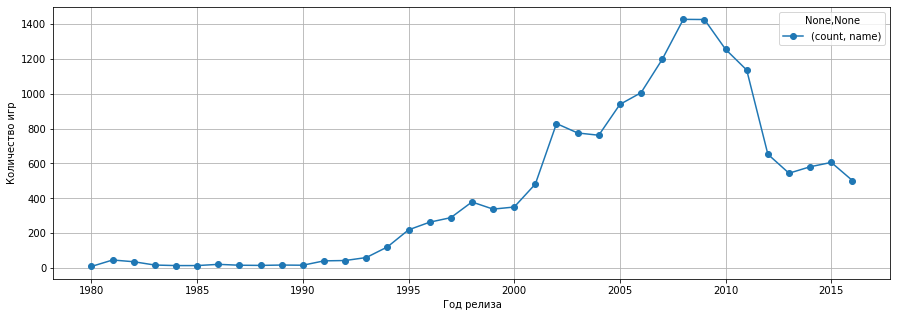

In [14]:
data.pivot_table(index='year_of_release', 
                 values='name', 
                 aggfunc=['count']).plot(grid=True, 
                                         style='-o', 
                                         figsize=(15, 5))
plt.xlabel('Год релиза')
plt.ylabel('Количество игр')

**Вывод**

На графике видно, что что в 80-ых - 00-ые культура игр только зарождалась, но даже на небольших данных заметно, что уже тогда игры имели потенциал для развития. Начиная с 2000-ых начался  заметный рост. Пик производства игр приходится на 2008 и 2009 года. Позже идет спад, который связан возможно с появлением мобильных платформ iOS и Android и развитием мобильных игр.

#### Анализ платформ и их жизненный цикл

Посмотрим, как менялись продажи по платформам и выясним за какой характерный срок появляются новые и исчезают старые платформы.

In [15]:
# создадим список из топ-6 популярных платформ
top_platform = data.pivot_table(index='platform', 
                                values='total_sales', 
                                aggfunc='sum').sort_values(by='total_sales', 
                                                           ascending=False)
top_platform.head(10)

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


Text(0, 0.5, 'Количество продаж')

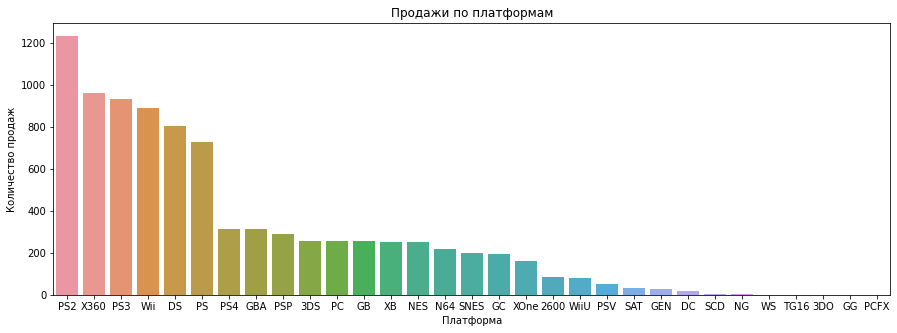

In [16]:
plt.figure(figsize=(15,5))
sns.barplot(x=top_platform.index,y=top_platform['total_sales'])
plt.title("Продажи по платформам")
plt.xlabel("Платформа")
plt.ylabel("Количество продаж")

Мы получили самые популярные 6 платформ за период: PS2, X360, PS3, Wii, DS, PS. 

Теперь посмотрим на их распределение всех платформ по годам.

/opt/conda/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:337: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


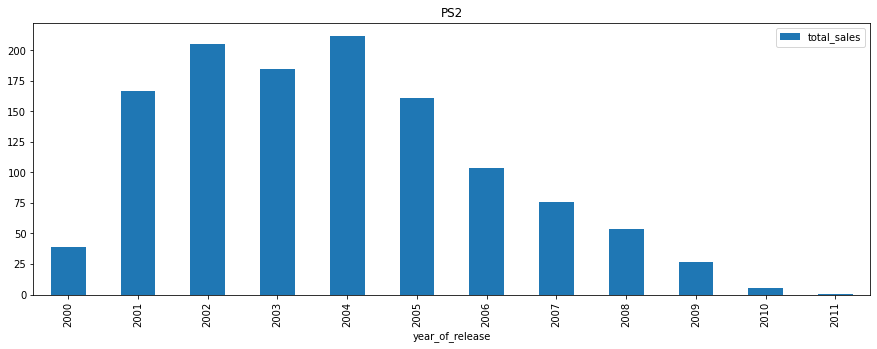

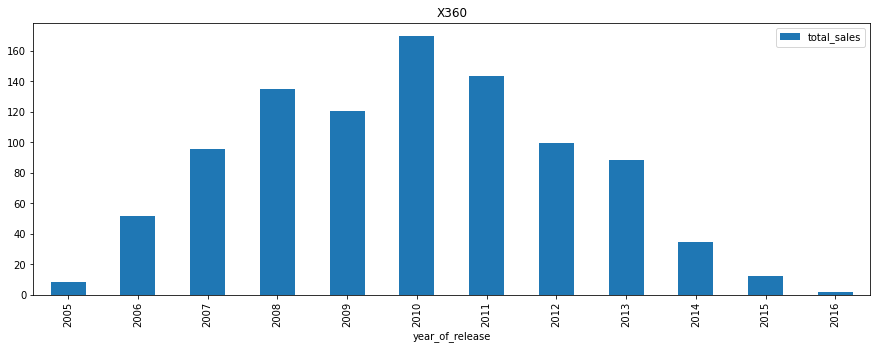

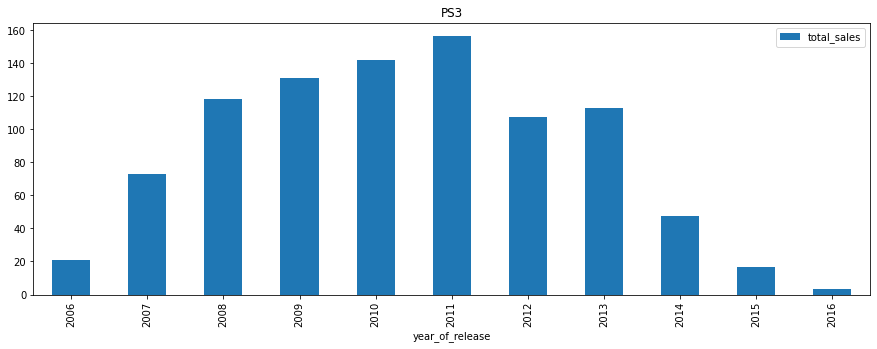

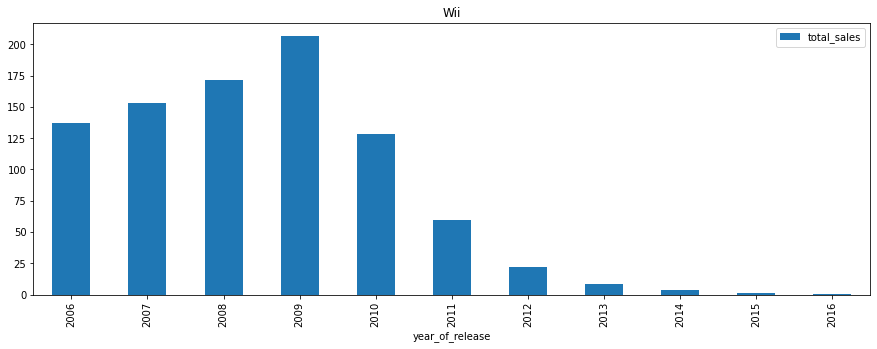

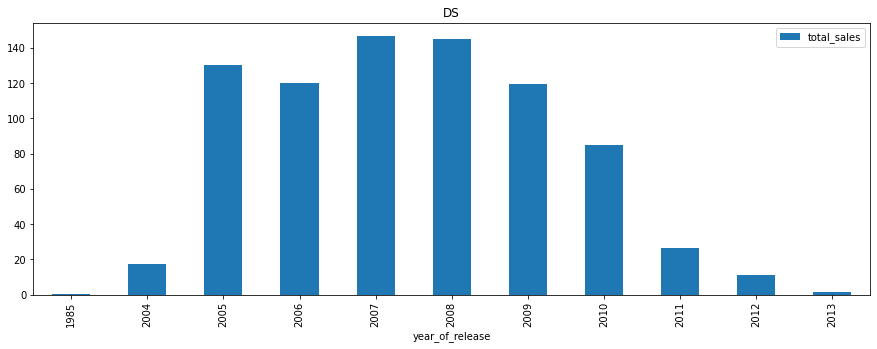

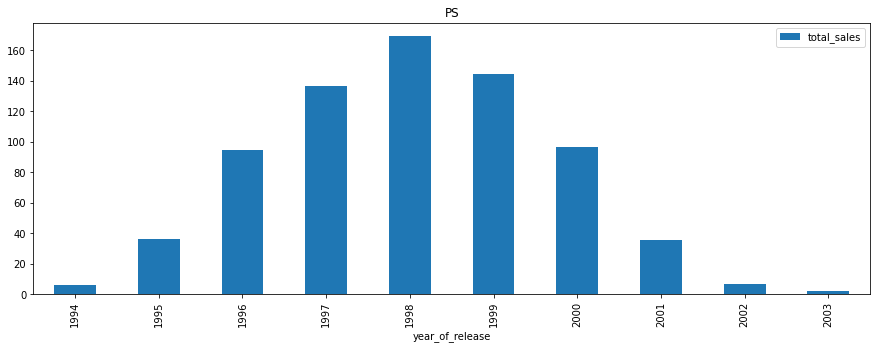

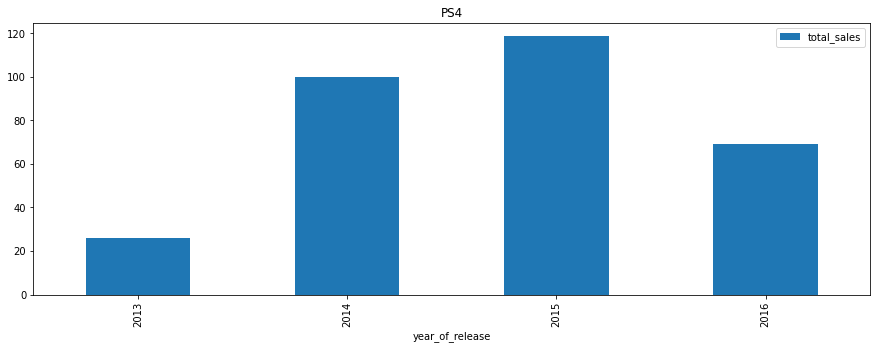

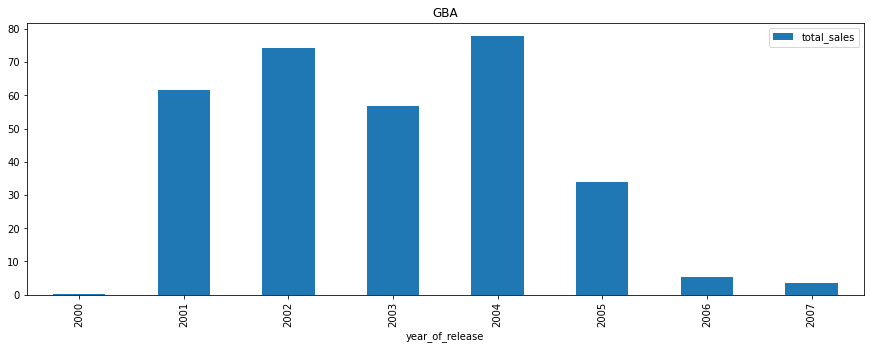

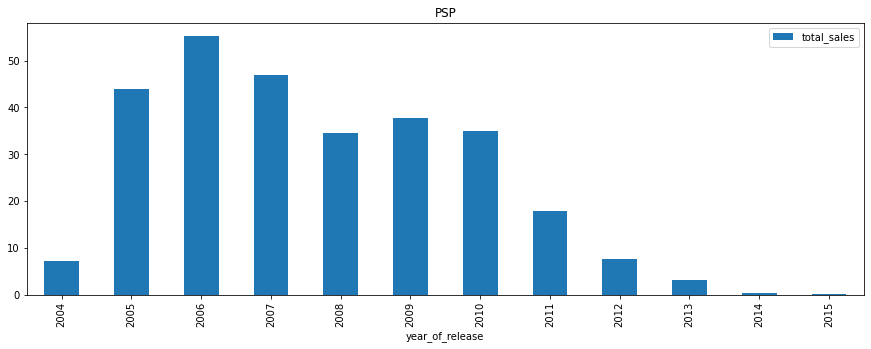

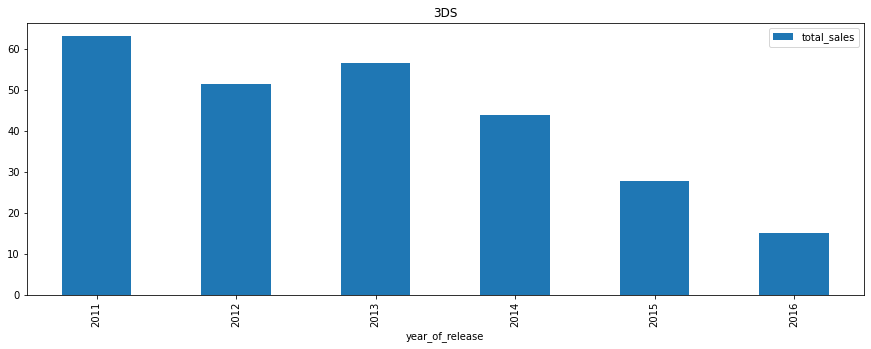

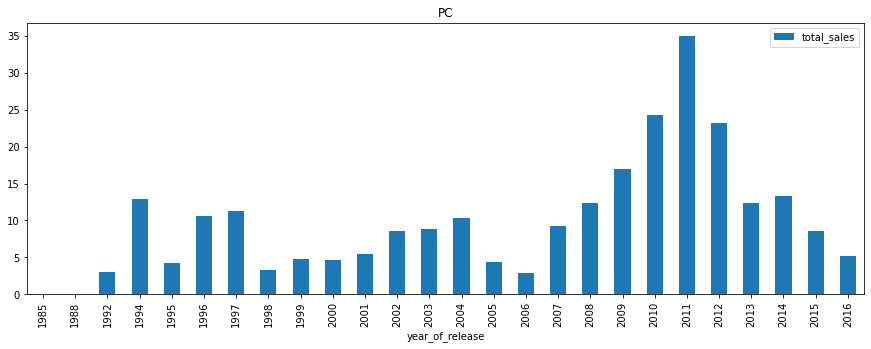

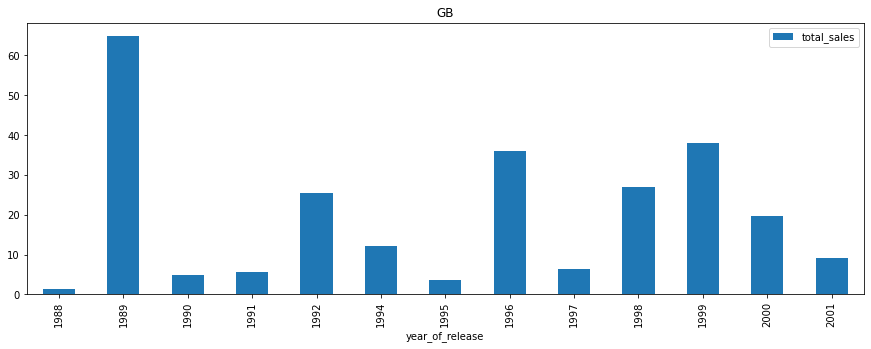

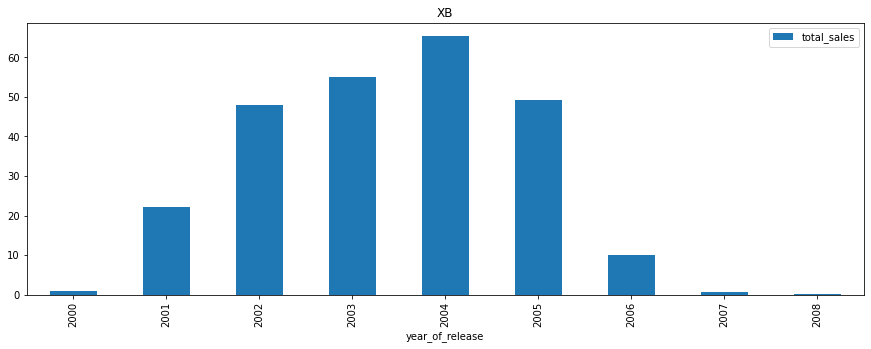

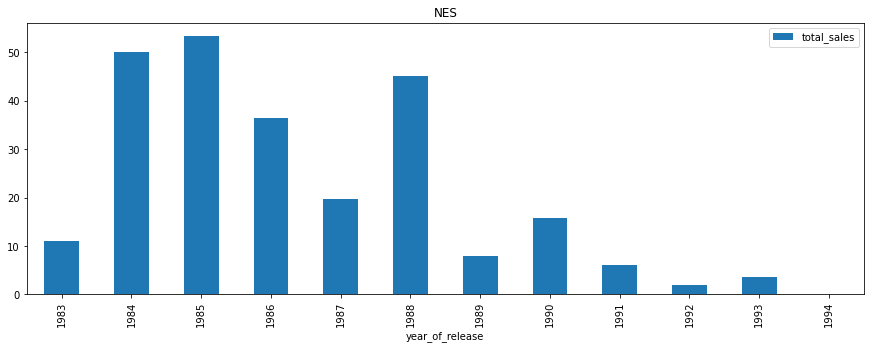

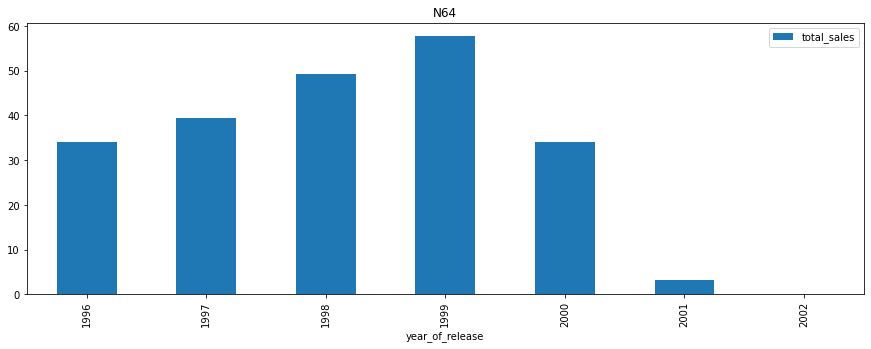

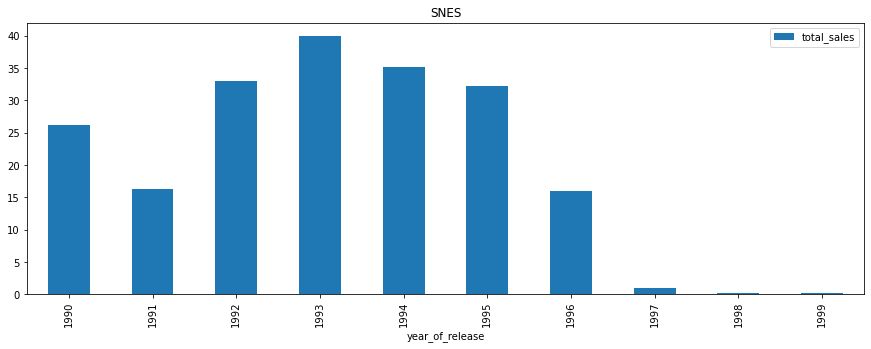

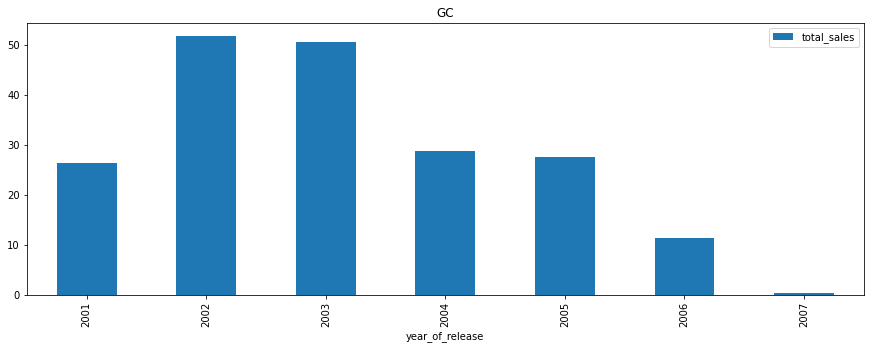

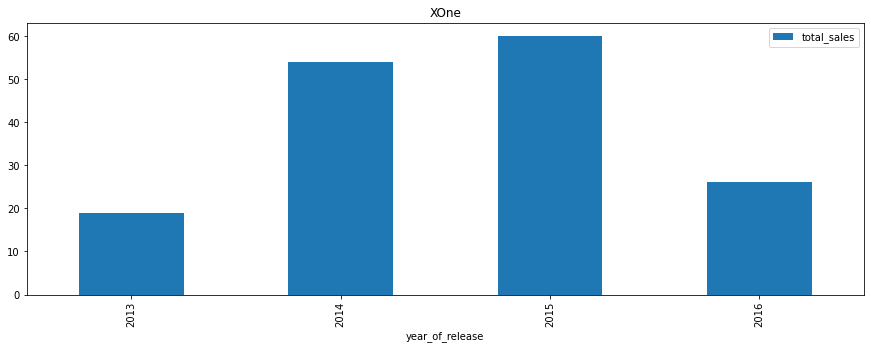

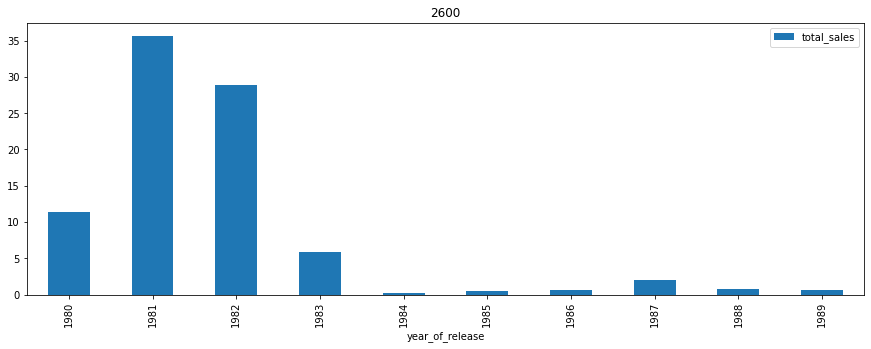

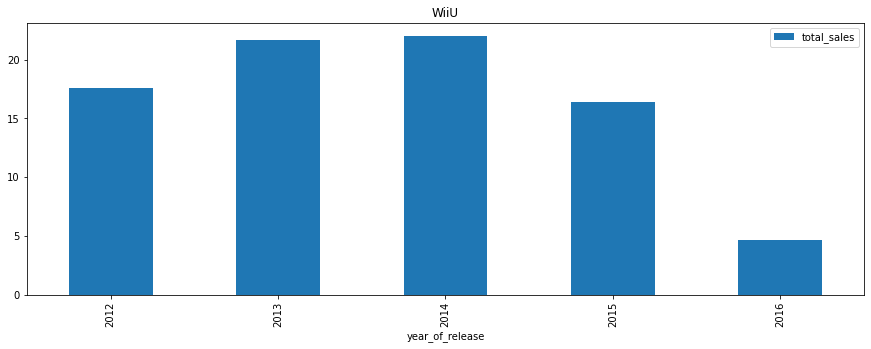

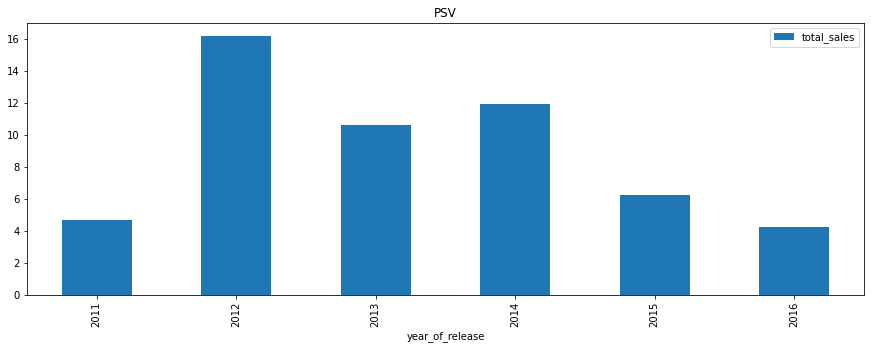

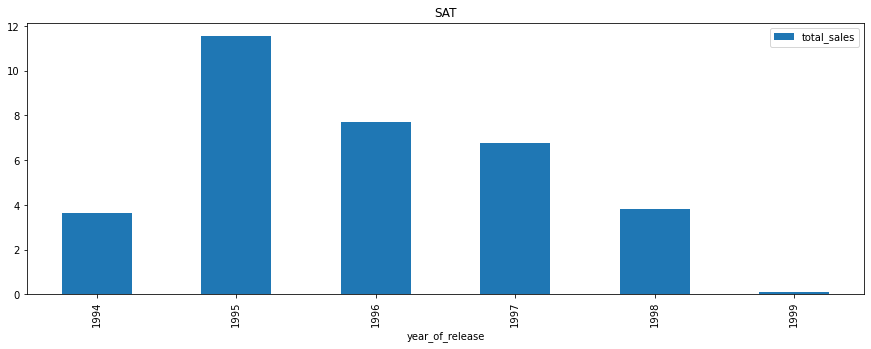

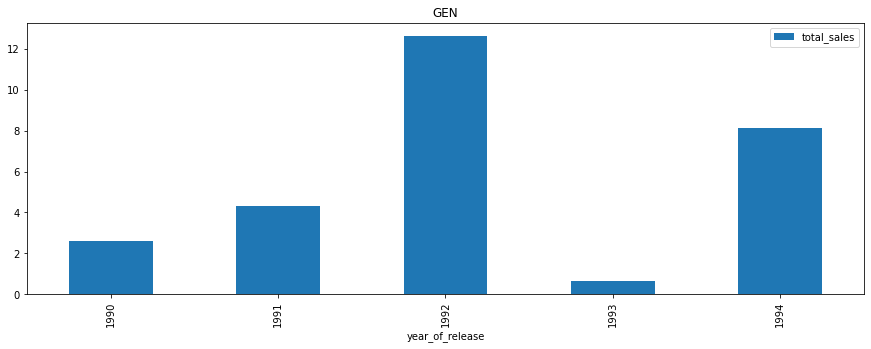

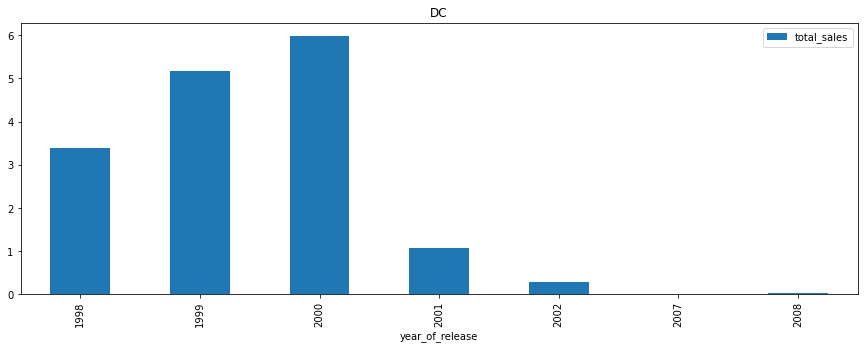

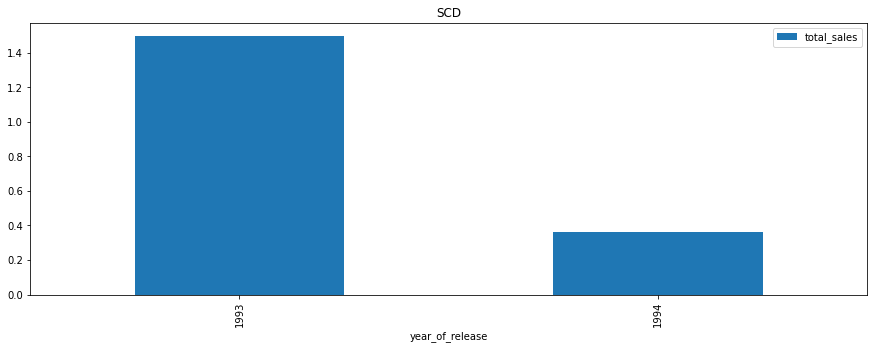

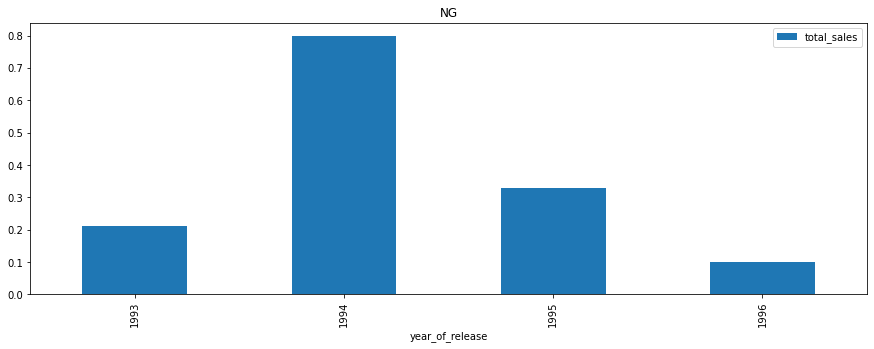

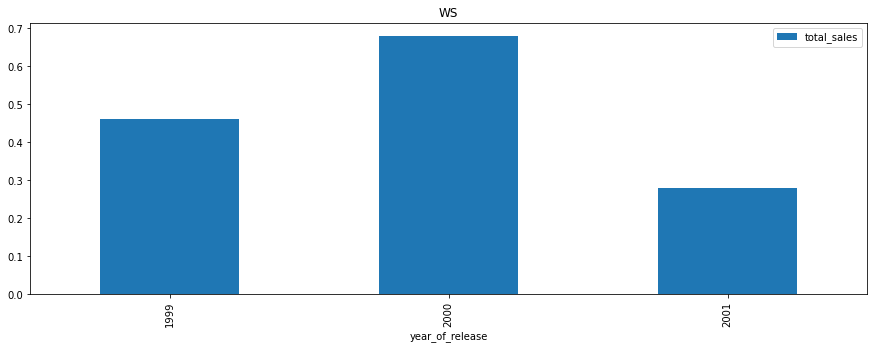

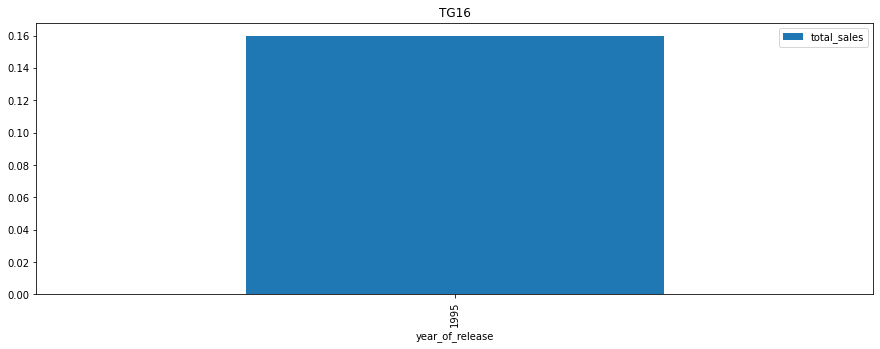

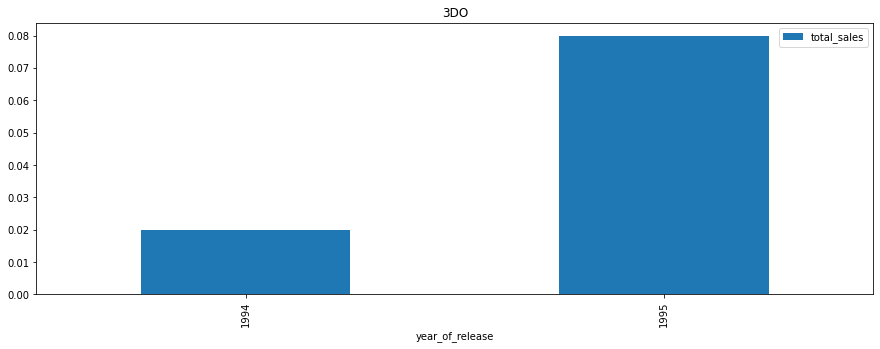

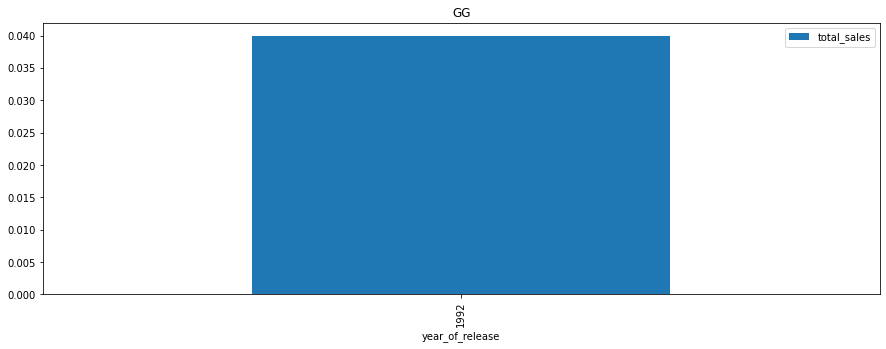

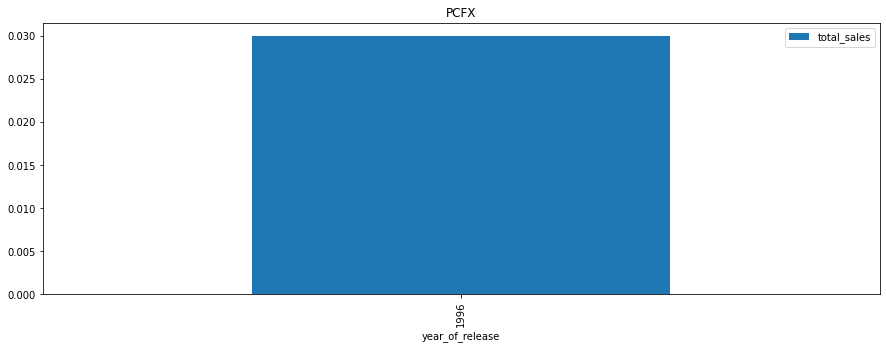

In [17]:
top_6 = top_platform.index.unique()
for platform in top_6:
    data[data['platform'] == platform].pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(
        kind='bar', figsize=(15,5))
    plt.title(platform)

По графикам выше можно сделать вывод, что средний период жизни платформы 7-8 лет, после чего продажи идут на спад. 

Популярность набирают такие платформы, как:
PS4, PS, xOne. Это потенциально прибыльные платформы на 2017 год.

Изучив подробно графики, можно сделать вывод, что для дальнейшего анализа нам не нужны очень старые данные, поэтому сократим датасет и оставим все начиная с 2014 года.

In [18]:
#создадим новый рабочий датасет
df = data[data['year_of_release'] >= 2014]
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,0,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,0,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,0,7.98


#### Глобальные продажи игр в разбивке по платформам

Дальше посмотрим на глобальные продажи игр в разбивке по платформам.

In [19]:
#создадим новую сводную таблицу по свежим данным
actual_platforms = df.pivot_table(index='platform', 
                                values='total_sales', 
                                aggfunc='sum').sort_values(by='total_sales', 
                                                           ascending=False)
actual_platforms

,total_sales
platform,
PS4,288.15
XOne,140.36
3DS,86.68
PS3,68.18
X360,48.22
WiiU,42.98
PC,27.05
PSV,22.40
Wii,5.07


Топ-5 перспективным платформ по продажам: 'PS4', 'XOne', '3DS', 'PS3', 'X360'. Я бы остановилась на 'PS4', 'XOne' как на самых новых.

In [20]:
platforms_list = df.query('platform == "PS3" or platform == "X360" \
or platform == "3DS" or platform == "PS4" or platform == "XOne"')
platforms_list

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,0,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,0,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,0,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
16401,Metal Gear Solid V: The Definitive Experience,XOne,2016,Action,0.01,0.00,0.00,0.00,NaN,NaN,M,0.01
16403,Tsukigime Ranko's Longest Day,PS3,2014,Action,0.00,0.01,0.00,0.00,NaN,NaN,0,0.01
16406,Aikatsu Stars! My Special Appeal,3DS,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,0,0.01
16420,Dynasty Warriors: Eiketsuden,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,0,0.01


Text(0, 0.5, 'Продажи')

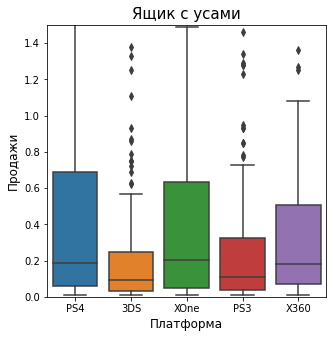

In [21]:
#oтрисуем ящики с усами 
plt.figure(figsize=(5,5))
sns.boxplot(data=platforms_list, x='platform', y='total_sales')
plt.ylim([0, 1.5])
plt.title('Ящик с усами', fontsize=15)
plt.xlabel('Платформа', fontsize=12)
plt.ylabel('Продажи',fontsize=12)


**Вывод**

На графике видно, что медиана у всех разная. 
Продаж больше всего у x360 и Xone, далее идет x360. И меньше всего продаж у и 3DS, это довольно новая платформа, которая просто уступает своим конкурентам. Также мало продаж и у PS3, это объясняется тем, что это уже довольно старая платформа, а мы рассматриваем данные начиная с 2014.
PS4 - самая новая и только набирает популярность. PS3 передает лидерство более новой приставке PS4, такжеи с x360 и XOne, если взять еще более свежие данные для анализа.

#### Влияние отзывов пользователей и критиков

Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. 

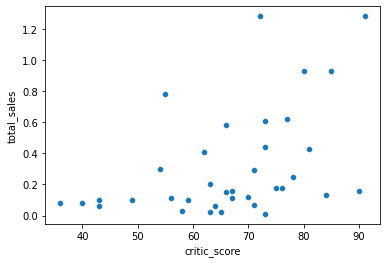

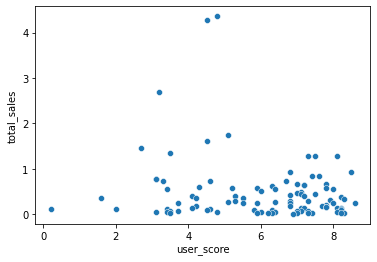

0.44657460493190704
-0.16676141347662118


In [22]:
sns.scatterplot(x='critic_score', y='total_sales', data=df[df['platform']=='PS3'])
plt.show()
sns.scatterplot(x='user_score', y='total_sales', data=df[df['platform']=='PS3'])
plt.show()
print(df[df['platform']=='PS3']['critic_score'].corr(df['total_sales']))
print(df[df['platform']=='PS3']['user_score'].corr(df['total_sales']))

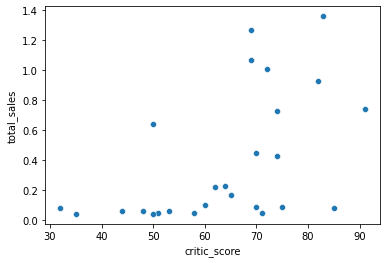

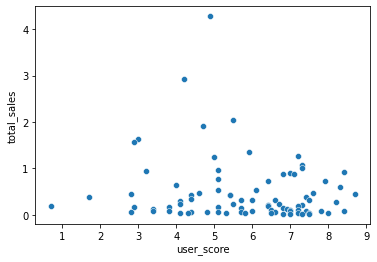

0.5257228356581523
-0.138444570945665


In [23]:
sns.scatterplot(x='critic_score', y='total_sales', data=df[df['platform']=='X360'])
plt.show()
sns.scatterplot(x='user_score', y='total_sales', data=df[df['platform']=='X360'])
plt.show()
print(df[df['platform']=='X360']['critic_score'].corr(df['total_sales']))
print(df[df['platform']=='X360']['user_score'].corr(df['total_sales']))

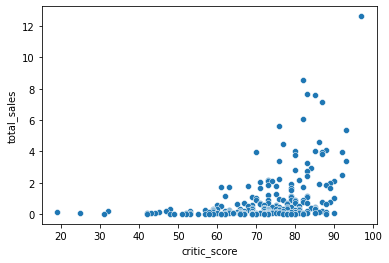

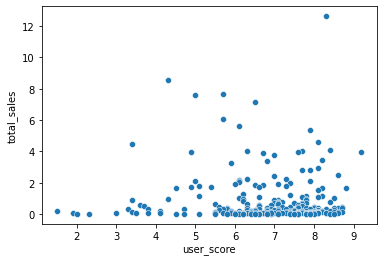

0.40266141068104083
-0.040131589472697356


In [24]:
sns.scatterplot(x='critic_score', y='total_sales', data=df[df['platform']=='PS4'])
plt.show()
sns.scatterplot(x='user_score', y='total_sales', data=df[df['platform']=='PS4'])
plt.show()
print(df[df['platform']=='PS4']['critic_score'].corr(df['total_sales']))
print(df[df['platform']=='PS4']['user_score'].corr(df['total_sales']))

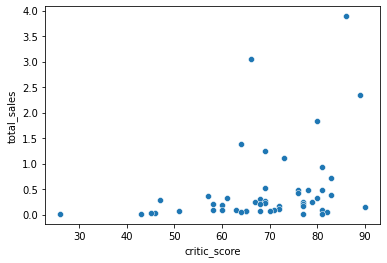

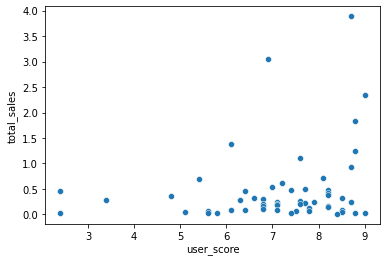

0.314117492869051
0.2151932718527028


In [25]:
sns.scatterplot(x='critic_score', y='total_sales', data=df[df['platform']=='3DS'])
plt.show()
sns.scatterplot(x='user_score', y='total_sales', data=df[df['platform']=='3DS'])
plt.show()
print(df[df['platform']=='3DS']['critic_score'].corr(df['total_sales']))
print(df[df['platform']=='3DS']['user_score'].corr(df['total_sales']))

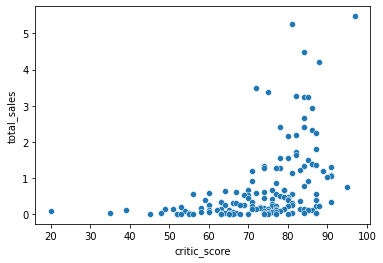

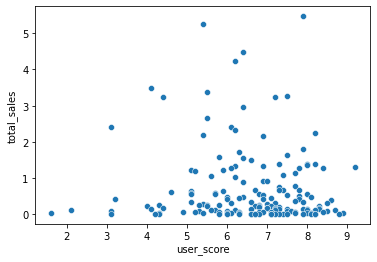

0.42867694370333226
-0.0703839280647581


In [26]:
sns.scatterplot(x='critic_score', y='total_sales', data=df[df['platform']=='XOne'])
plt.show()
sns.scatterplot(x='user_score', y='total_sales', data=df[df['platform']=='XOne'])
plt.show()
print(df[df['platform']=='XOne']['critic_score'].corr(df['total_sales']))
print(df[df['platform']=='XOne']['user_score'].corr(df['total_sales']))

**Вывод**

Основной вывод, который можно сделать, глядя на все графики, что взаимосвязь отзывов и продаж хоть и не сильная,  но есть. В большей мере на продажи влияют отзывы критиков. А связь между оценками пользователей и продажами слабая у всех платформ, либо её совсем нет. Поэтому можно сделать выводы, что пользователи чаще прислушиваются критиков, чем других игроков. 

####  Распределение игр по жанрам

Посмотрим на общее распределение игр по жанрам. Найдем самые прибыльные жанры. Посмотрим выделяются ли жанры с высокими и низкими продажами?

In [27]:
#создадим новую сводную таблицу по жанрам
genre_list = df.pivot_table(index='genre', 
                                values='total_sales', 
                                aggfunc='sum').sort_values(by='total_sales', 
                                                           ascending=False)
genre_list

,total_sales
genre,
Action,199.36
Shooter,170.94
Sports,109.48
Role-Playing,101.44
Misc,37.55
Fighting,28.22
Racing,27.52
Platform,18.09
Adventure,17.55


Text(0, 0.5, 'Количество продаж')

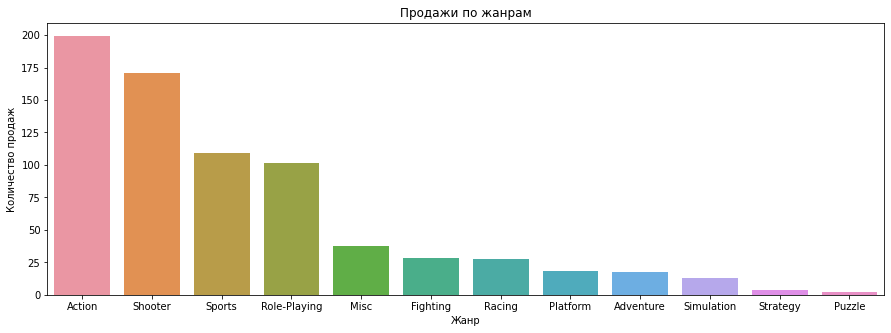

In [28]:
plt.figure(figsize=(15,5))
sns.barplot(x=genre_list.index,y=genre_list['total_sales'])
plt.title("Продажи по жанрам")
plt.xlabel("Жанр")
plt.ylabel("Количество продаж")

In [29]:
#создадим новую сводную таблицу по жанрам и посчитаем медианные значения
genre_list_median = df.pivot_table(index='genre', 
                                values='total_sales', 
                                aggfunc='median').sort_values(by='total_sales', 
                                                           ascending=False)
genre_list

,total_sales
genre,
Action,199.36
Shooter,170.94
Sports,109.48
Role-Playing,101.44
Misc,37.55
Fighting,28.22
Racing,27.52
Platform,18.09
Adventure,17.55


Text(0, 0.5, 'Количество продаж')

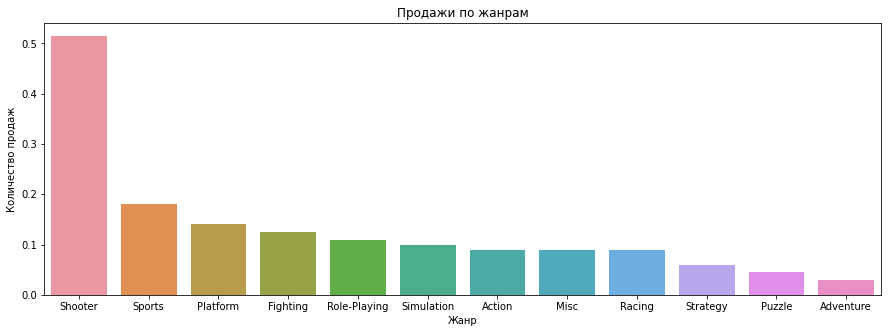

In [30]:
plt.figure(figsize=(15,5))
sns.barplot(x=genre_list_median.index,y=genre_list_median['total_sales'])
plt.title("Продажи по жанрам")
plt.xlabel("Жанр")
plt.ylabel("Количество продаж")

**Вывод**

Наиболее популярные жанры: Action, Shooter, Sports, Role-Playing, Misc. На последнем месте стратегии и пазлы. На первых местах игры, которые требуют больше ресурсов для их создания. 

Ситуация с медианными зачениями выглядят немного иначе: выделяется Shooter (0.51), дальше идет Sports и Platform. При создании новой игры или рекламной кампании я бы обратила внимание на Shooter и Sports, которые выделяются на двух графиках.

### Портрет пользователя каждого региона

#### Анализ пользователей в Северной Америке

Опишем портрет пользователя для каждого региона. Начнем с Северной Америки.

Text(0, 0.5, 'Количество продаж')

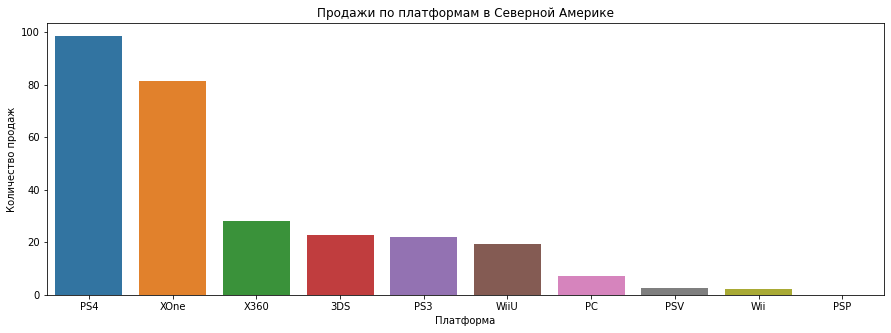

In [31]:
na_sales_list = df.pivot_table(index='platform', 
                                values='na_sales', 
                                aggfunc='sum').sort_values(by='na_sales', 
                                                           ascending=False)

plt.figure(figsize=(15,5))
sns.barplot(x=na_sales_list.index,y=na_sales_list['na_sales'])
plt.title("Продажи по платформам в Северной Америке")
plt.xlabel("Платформа")
plt.ylabel("Количество продаж")

Text(0, 0.5, 'Количество продаж')

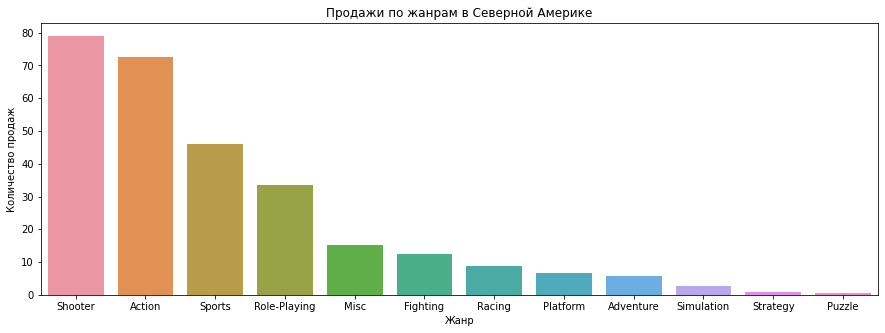

In [32]:
na_genres_list = df.pivot_table(index='genre', 
                                values='na_sales', 
                                aggfunc='sum').sort_values(by='na_sales', 
                                                           ascending=False)

plt.figure(figsize=(15,5))
sns.barplot(x=na_genres_list.index,y=na_genres_list['na_sales'])
plt.title("Продажи по жанрам в Северной Америке")
plt.xlabel("Жанр")
plt.ylabel("Количество продаж")

Text(0, 0.5, 'Количество продаж')

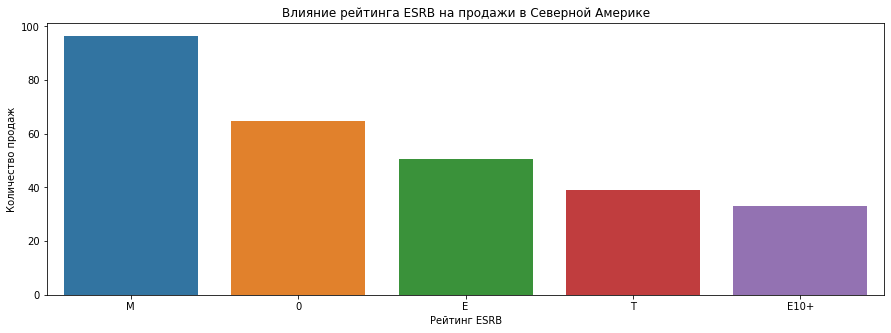

In [33]:
na_rating_list = df.pivot_table(index='rating', 
                                values='na_sales', 
                                aggfunc='sum').sort_values(by='na_sales', 
                                                           ascending=False)

plt.figure(figsize=(15,5))
sns.barplot(x=na_rating_list.index,y=na_rating_list['na_sales'])
plt.title("Влияние рейтинга ESRB на продажи в Северной Америке")
plt.xlabel("Рейтинг ESRB")
plt.ylabel("Количество продаж")

Портрет пользователя в Северной Америке:
- любимая платформа X360, PS3, Wii, PS4, XOne
- любимые жанры: Action, Shooter, Sports, Misc, Role Playing
- любимые игры для взрослых и для всех. Рейтинг ESRB влияет на продажи.

#### Анализ пользователей в Европе

Изучим продажи в Европе.

Text(0, 0.5, 'Количество продаж')

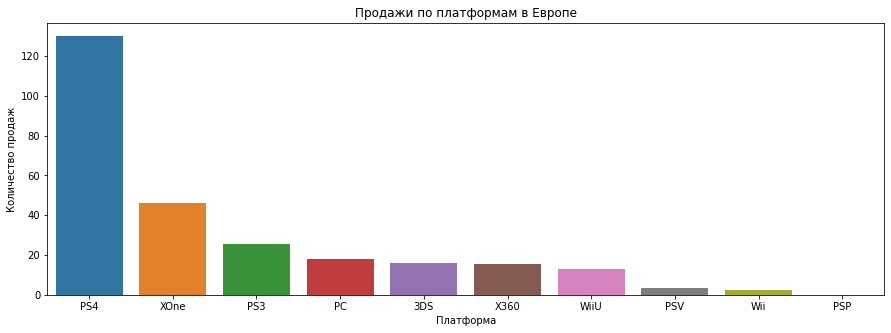

In [34]:
eu_sales_list = df.pivot_table(index='platform', 
                                values='eu_sales', 
                                aggfunc='sum').sort_values(by='eu_sales', 
                                                           ascending=False)

plt.figure(figsize=(15,5))
sns.barplot(x=eu_sales_list.index,y=eu_sales_list['eu_sales'])
plt.title("Продажи по платформам в Европе")
plt.xlabel("Платформа")
plt.ylabel("Количество продаж")

Text(0, 0.5, 'Количество продаж')

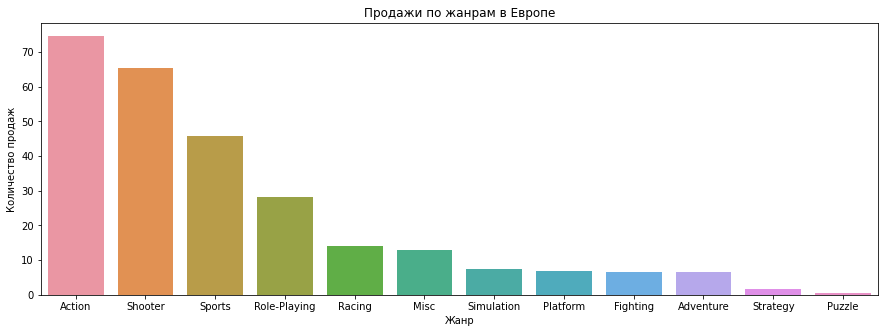

In [35]:
eu_genres_list = df.pivot_table(index='genre', 
                                values='eu_sales', 
                                aggfunc='sum').sort_values(by='eu_sales', 
                                                           ascending=False)

plt.figure(figsize=(15,5))
sns.barplot(x=eu_genres_list.index,y=eu_genres_list['eu_sales'])
plt.title("Продажи по жанрам в Европе")
plt.xlabel("Жанр")
plt.ylabel("Количество продаж")

Text(0, 0.5, 'Количество продаж')

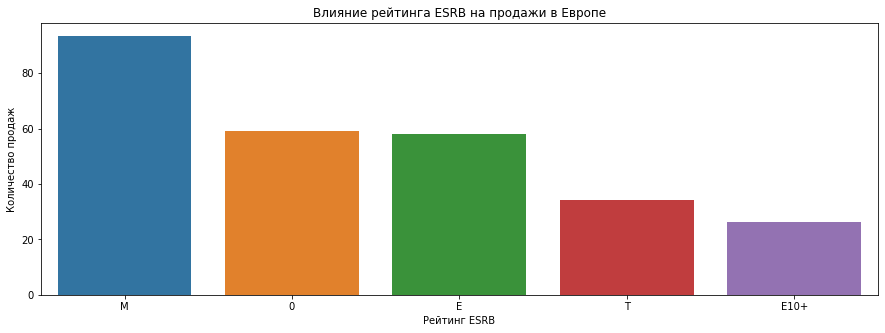

In [36]:
eu_rating_list = df.pivot_table(index='rating', 
                                values='eu_sales', 
                                aggfunc='sum').sort_values(by='eu_sales', 
                                                           ascending=False)

plt.figure(figsize=(15,5))
sns.barplot(x=eu_rating_list.index,y=eu_rating_list['eu_sales'])
plt.title("Влияние рейтинга ESRB на продажи в Европе")
plt.xlabel("Рейтинг ESRB")
plt.ylabel("Количество продаж")

Портрет пользователя в Европе не отличается от портрета в Америке:
- любимая платформа PS4, XOne, PS3, PC, 3DS
- любимые жанры: Action, Shooter, Sports, Role-Playing, Racing
- любимые игры для взрослых и для всех. Рейтинг влияет на продажи.

#### Анализ пользователей в Японии

Изучим продажи в Японии.

Text(0, 0.5, 'Количество продаж')

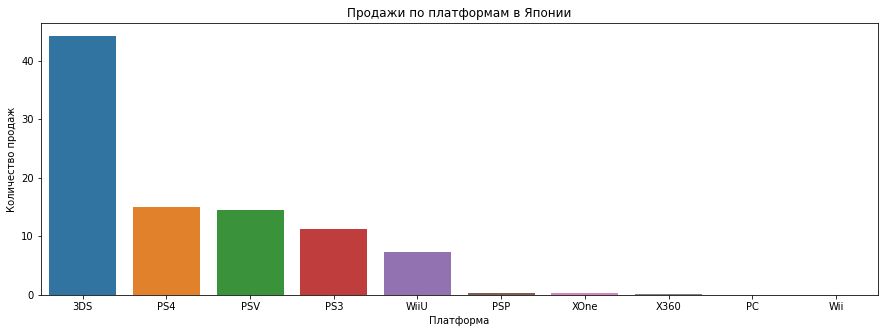

In [37]:
jp_sales_list = df.pivot_table(index='platform', 
                                values='jp_sales', 
                                aggfunc='sum').sort_values(by='jp_sales', 
                                                           ascending=False)

plt.figure(figsize=(15,5))
sns.barplot(x=jp_sales_list.index,y=jp_sales_list['jp_sales'])
plt.title('Продажи по платформам в Японии')
plt.xlabel('Платформа')
plt.ylabel('Количество продаж')

Text(0, 0.5, 'Количество продаж')

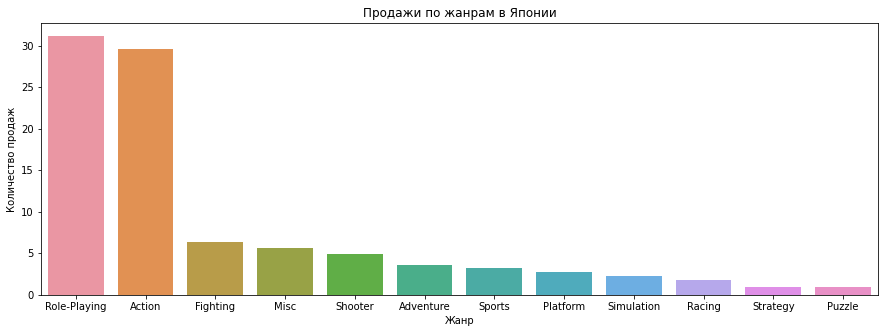

In [38]:
jp_genres_list = df.pivot_table(index='genre', 
                                values='jp_sales', 
                                aggfunc='sum').sort_values(by='jp_sales', 
                                                           ascending=False)

plt.figure(figsize=(15,5))
sns.barplot(x=jp_genres_list.index,y=jp_genres_list['jp_sales'])
plt.title("Продажи по жанрам в Японии")
plt.xlabel("Жанр")
plt.ylabel("Количество продаж")

Text(0, 0.5, 'Количество продаж')

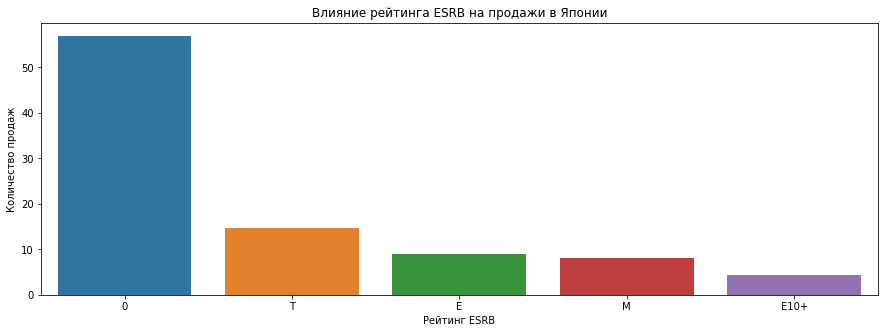

In [39]:
jp_rating_list = df.pivot_table(index='rating', 
                                values='jp_sales', 
                                aggfunc='sum').sort_values(by='jp_sales', 
                                                           ascending=False)

plt.figure(figsize=(15,5))
sns.barplot(x=jp_rating_list.index,y=jp_rating_list['jp_sales'])
plt.title("Влияние рейтинга ESRB на продажи в Японии")
plt.xlabel("Рейтинг ESRB")
plt.ylabel("Количество продаж")

Совсем иначе выглядит портрет пользователя в Японии:
- любимая платформа  3DS, PS4, PSP, WiiU, PSV
- любимые жанры: Role Playing, Action, Fighting, Misc, Shooter
- любимые игры для всех и для подростков. Но в Японии очень много пропусков в этом столбце, поэтому выводы могут быть неверными. Возможно Япония не всегда использует этот рейтинг в своей игровой индустрии.

### Проверка гипотез

#### Гипотеза 1

Нулевая гипотеза H₀: средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Альтернативная H₁: средние пользовательские рейтинги платформ Xbox One и PC разные.

Проверим гипотезу. 

In [40]:
xone = df[df['platform']=='XOne']['user_score']
pc = df[df['platform']=='PC']['user_score']
print(xone.mean())
print(pc.mean())

6.594545454545454
6.298360655737704


In [41]:
alpha = .02 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    xone.dropna(), 
    pc.dropna(), 
    equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.11601398086668832
Не получилось отвергнуть нулевую гипотезу


**Вывод**

Не удалось отвергнуть нулевую гипотезу, а значит средние пользовательские рейтинги платформ Xbox One и PC одинаковые или очень близки. 

#### Гипотеза 2

Нулевая гипотеза H₀: средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые.

Альтернативная гипотеза: H₁: средние пользовательские рейтинги жанров Action и Sports разные.

In [42]:
action = df[df['genre']=='Action']['user_score']
sports = df[df['genre']=='Sports']['user_score']
print(action.mean())
print(sports.mean())

6.760606060606061
5.225196850393701


In [43]:
alpha = .02 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    action.dropna(), 
    sports.dropna(), 
    equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 1.1825550382644557e-14
Отвергаем нулевую гипотезу


**Вывод**

Отвергаем нулевую гипотезу, таким образом, у нас практически нет шансов получить одинаковый рейтинг по двум жанрам. 

### Общий вывод

Проводилось исследование, цель которого анализ рынка игр и выявление закономерностей, которые позволят определить успешность игры. Данные будут использованы для рекламной кампании на следующий год. Для исследования взяты исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы. 

**Исследование предусматривает несколько этапов:**

- предобработка данных (заполнение пропусков и выявление аномалий)
- проведение исследовательского анализа данных
- составление портрета пользователя каждого региона 
- проверка гипотез 

**1. Предобработка данных**

В предобработке данных я привела названия столбцов к нижнему регистру, заполнила пропуски, где это возможно, изменила тип данных в столбцах year_of_release, critic_score, user_score. Другие стобцы я не трогала, так как тип данных там задан верно. Явные дубликаты не были найдены. Также был добавлен столбцец с суммарными продажами во всех регионах по каждой игре. 

**2. Иследовательский анализ данных**

В результате анализа, было выявлено, что в 80-ых - 00-ые культура игр только зарождалась, но даже на небольших данных заметно, что уже тогда игры имели потенциал для развития. Начиная с 2000-ых начался  заметный рост, что логично, так как технологии начали быстро развиваться. Пик производства игр приходится на 2008 и 2009 года. Позже идет спад, который связан возможно с появлением мобильных платформ iOS и Android и развитием мобильных игр.

Средний период жизни платформы 7-8 лет, после чего продажи идут на спад. Это важно учесть при выборе платформы для разработки игры. 

Популярность набирают такие платформы, как: PS4 и xOne. Это потенциально прибыльные платформы на 2017 год.

Изучив подробно графики, можно сделать вывод, что для дальнейшего анализа нам не нужны очень старые данные, поэтому мы сократили датасет и оставим все начиная с 2014 года.

Я сделала график "ящик с усами", который показал что медианное значение продаж у всех платформ разное. Продаж больше всего у x360 и Xone, далее идет x360. И меньше всего продаж у и 3DS, это довольно новая платформа, которая просто уступает своим конкурентам. Также мало продаж и у PS3, это объясняется тем, что это уже довольно старая платформа, а мы рассматриваем данные начиная с 2014.
PS4 - самая новая и только набирает популярность. PS3 передает лидерство более новой приставке PS4, такжеи с x360 и XOne, если взять еще более свежие данные для анализа.

Основной вывод, который можно сделать, глядя на все графики, что взаимосвязь отзывов и продаж хоть и не сильная, но есть. В большей мере на продажи влияют отзывы критиков. А связь между оценками пользователей и продажами слабая у всех платформ, либо её совсем нет. Поэтому можно сделать выводы, что пользователи чаще прислушиваются критиков, чем других игроков.

Наиболее популярные жанры: Action, Shooter, Sports, Role-Playing, Misc. На последнем месте стратегии и пазлы. на первых местах игры, которые требуют больше ресурсов для их создания. Ситуация с медианными зачениями выглядят немного иначе: выделяется Shooter (0.51), дальше идет Sports и Platform. При создании новой игры или рекламной кампании я бы обратила внимание на Shooter и Sports.

**3. Составление портрета пользователей по регионам**

Портрет пользователя в Северной Америке:

- любимая платформа X360, PS3, Wii, PS4, XOne
- любимые жанры: Action, Shooter, Sports, Misc, Role Playing
- любимые игры для взрослых и для всех. Рейтинг ESRB влияет на продажи.

Портрет пользователя в Европе не отличается от портрета в Америке:

- любимая платформа PS4, XOne, PS3, PC, 3DS
- любимые жанры: Action, Shooter, Sports, Role-Playing, Racing
- любимые игры для взрослых и для всех. Рейтинг влияет на продажи.

Совсем иначе выглядит портрет пользователя в Японии:

- любимая платформа 3DS, PS4, PSP, WiiU, PSV
- любимые жанры: Role Playing, Action, Fighting, Misc, Shooter
- любимые игры для всех и для подростков. Но в Японии очень много пропусков в этом столбце, поэтому выводы могут быть неверными. Возможно Япония не всегда использует этот рейтинг в своей игровой индустрии.

**4. Проверка гипотез**

Я проверяла две гипотезы. Одна из которых подвердилась.

- Гипотеза 1.

Нулевая гипотеза H₀: средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Альтернативная H₁: средние пользовательские рейтинги платформ Xbox One и PC разные.

Не удалось отвергнуть нулевую гипотезу, а значит средние пользовательские рейтинги платформ Xbox One и PC одинаковые или очень близки.

- Гипотеза 2.

Нулевая гипотеза H₀: средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые.

Альтернативная гипотеза: H₁: средние пользовательские рейтинги жанров Action и Sports разные.

Отвергаем нулевую гипотезу, таким образом, у нас практически нет шансов получить одинаковый рейтинг по двум жанрам

На основе всех выводов, мы можем выбрать наиболее перспективные платфомы, жанры, регионы для запуска рекламной кампании в 2017 году. 